<a href="https://colab.research.google.com/github/parktaeshin/book/blob/main/08_3_%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%98_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras

In [2]:
# 코랩에서 실행하는 경우에는 다음 명령을 실행하여 best-cnn-model.h5 파일을 다운로드받아 사용하세요.
!wget https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5

--2022-02-23 06:39:36--  https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.h5 [following]
--2022-02-23 06:39:37--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4049416 (3.9M) [application/octet-stream]
Saving to: ‘best-cnn-model.h5’

best-cnn-model.h5   100%[===================>]   3.86M  --.-KB/s    in 0.07s   

2022-02-23 06:39:37 (54.4 MB/s) - ‘best-cnn-model.h5’ saved [4049416/4049416]



In [3]:
model = keras.models.load_model('best-cnn-model.h5')

In [4]:
model.layers

In [5]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [10]:
model.layers[0].weights[1]

<tf.Variable 'conv2d/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.01347532,  0.00457351, -0.01942344,  0.02069282, -0.00718271,
        0.00065067, -0.00912159,  0.02191769,  0.00904154,  0.00507019,
        0.12295544, -0.01217632, -0.01042872,  0.0090463 , -0.00253875,
       -0.01881626, -0.01092561, -0.00150568, -0.00829567, -0.02996251,
       -0.22653033, -0.17335178, -0.14715962,  0.02092165, -0.0314569 ,
       -0.1564053 , -0.01476744, -0.00921626,  0.03029864, -0.01253888,
       -0.01263742, -0.04349709], dtype=float32)>

In [11]:
model.layers[0].weights[0]

<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-1.48220718e-01, -2.77182847e-01,  1.08491890e-01,
          -2.43038520e-01, -2.00723648e-01, -1.54011503e-01,
           1.70267597e-02,  1.52056798e-01, -7.35997930e-02,
          -1.43009841e-01, -3.45555305e-01, -1.49833426e-01,
           1.43565223e-01, -2.71067172e-01, -2.60950148e-01,
           2.68019196e-02,  2.71757692e-01, -1.29052728e-01,
          -4.07845750e-02,  1.89817861e-01,  1.71886329e-02,
           1.82105109e-01, -6.41871914e-02, -1.41360521e-01,
           2.37625465e-01,  1.46144599e-01, -7.07132444e-02,
           1.62760794e-01,  5.75430095e-02,  6.72889128e-02,
          -8.11542198e-02,  8.97996034e-03]],

        [[-8.49163830e-02, -3.96132559e-01,  1.12040557e-01,
           9.26233083e-02, -3.91667243e-03, -9.54327583e-02,
           2.39643410e-01,  2.01588720e-01,  2.61006188e-02,
           2.07760945e-01, -1.31966245e+00,  4.10751067e-02,
           2.75963340e-02,

In [14]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.0065098377 0.22782646


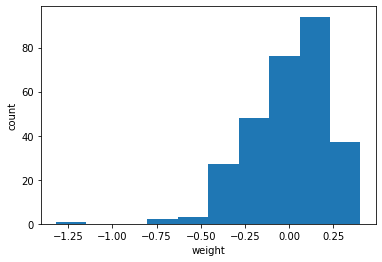

In [15]:
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1,1))
plt.xlabel("weight")
plt.ylabel("count")
plt.show()

In [19]:
conv_weights.reshape(-1,1).shape

(288, 1)

In [24]:
conv_weights.shape

(3, 3, 1, 32)

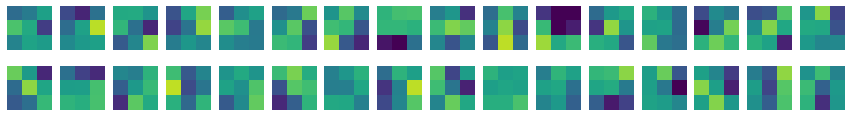

In [25]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

In [23]:
conv_weights[:,:,0]

array([[[-1.48220718e-01, -2.77182847e-01,  1.08491890e-01,
         -2.43038520e-01, -2.00723648e-01, -1.54011503e-01,
          1.70267597e-02,  1.52056798e-01, -7.35997930e-02,
         -1.43009841e-01, -3.45555305e-01, -1.49833426e-01,
          1.43565223e-01, -2.71067172e-01, -2.60950148e-01,
          2.68019196e-02,  2.71757692e-01, -1.29052728e-01,
         -4.07845750e-02,  1.89817861e-01,  1.71886329e-02,
          1.82105109e-01, -6.41871914e-02, -1.41360521e-01,
          2.37625465e-01,  1.46144599e-01, -7.07132444e-02,
          1.62760794e-01,  5.75430095e-02,  6.72889128e-02,
         -8.11542198e-02,  8.97996034e-03],
        [-8.49163830e-02, -3.96132559e-01,  1.12040557e-01,
          9.26233083e-02, -3.91667243e-03, -9.54327583e-02,
          2.39643410e-01,  2.01588720e-01,  2.61006188e-02,
          2.07760945e-01, -1.31966245e+00,  4.10751067e-02,
          2.75963340e-02, -2.18376350e-02, -2.27942526e-01,
          3.21309119e-01,  4.68326658e-02, -3.06282461e-

In [26]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = "relu", padding = "same", input_shape = (28,28,1)))

In [27]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [28]:
no_training_model

In [30]:
no_training_model.layers[0]

In [31]:
no_training_weights = no_training_conv.weights[0].numpy()

print(no_training_weights.mean(), no_training_weights.std())

0.008372022 0.08206716


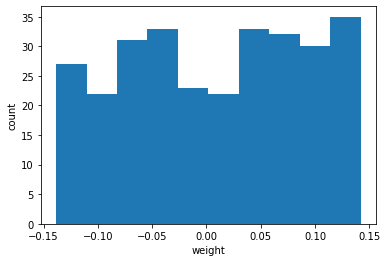

In [32]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

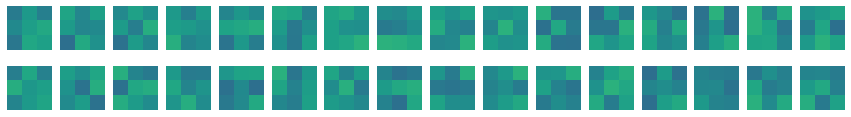

In [33]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

In [34]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [35]:
model

In [36]:
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_input')>

In [37]:
conv_acti = keras.Model(model.input, model.layers[0].output)


In [38]:
conv_acti

In [39]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


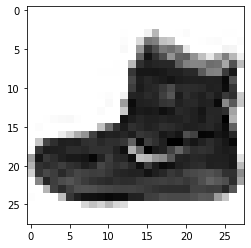

In [40]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [41]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0

feature_maps = conv_acti.predict(inputs)

In [42]:
feature_maps

array([[[[0.        , 0.00457351, 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.00457351, 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.00457351, 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.00457351, 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.00457351, 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.00457351, 0.        , ..., 0.        ,
          0.        , 0.        ]],

        [[0.        , 0.00457351, 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.00457351, 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.00457351, 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.00457351, 0.        , ..., 0.        ,
          0.        , 0. 

In [43]:
model.layers

In [44]:
print(feature_maps.shape)

(1, 28, 28, 32)


In [46]:
feature_maps

array([[[[0.        , 0.00457351, 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.00457351, 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.00457351, 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.00457351, 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.00457351, 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.00457351, 0.        , ..., 0.        ,
          0.        , 0.        ]],

        [[0.        , 0.00457351, 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.00457351, 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.00457351, 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.00457351, 0.        , ..., 0.        ,
          0.        , 0. 

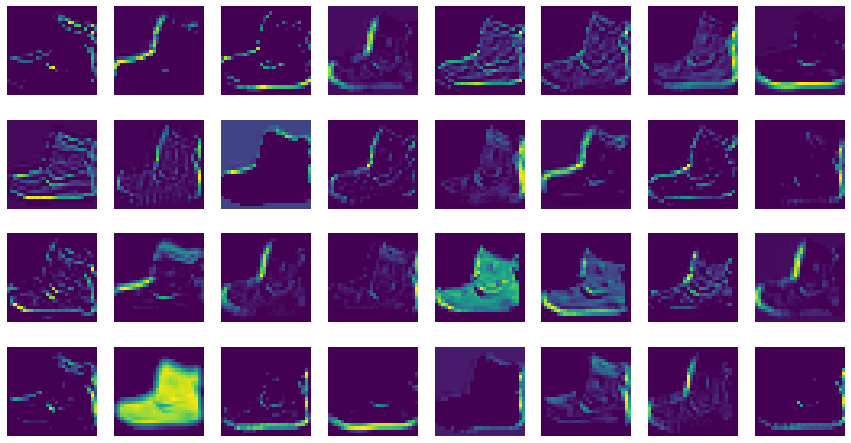

In [45]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

In [47]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [50]:
model.layers[2].output

<KerasTensor: shape=(None, 14, 14, 64) dtype=float32 (created by layer 'conv2d_1')>

In [51]:
feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1)/255.0)

In [52]:
print(feature_maps.shape)

(1, 14, 14, 64)


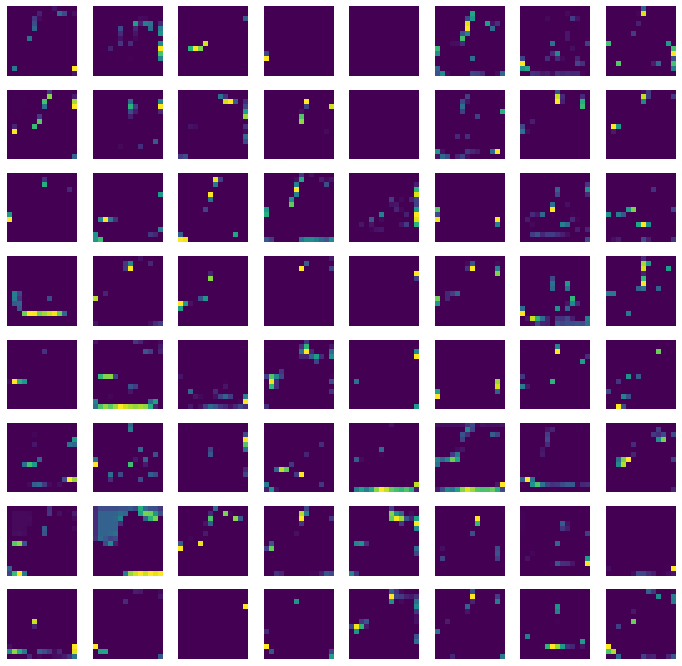

In [53]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()